## Problem 1 (Loops and Conditionals)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1.1

In [2]:
i = 1 #starting from one

while ((i%11 != 0)or(np.sqrt(i) <= 132)or(i%2 == 0)): #keeps going as long is i is not divisible by 11 or its square root is not greather than 132
    i += 1 #incrementing after each run

print("The required number is:", i)

The required number is: 17435


### Problem 1.2

In [3]:
x = [-3.5, 5, -6.2, 11.1, 0, 8.1, -9, 0, 3, -1, 3, 2.5] #x list with numbers
P = [] #positive array
N = [] #negative array

for n in x:
    if (n >= 0): #if n is positive add to P
        P.append(n)
    else: #if n is negative add to N
        N.append(n)

print(P)
print(N)

[5, 11.1, 0, 8.1, 0, 3, 3, 2.5]
[-3.5, -6.2, -9, -1]


### Problem 1.3

In [4]:
x = np.array(x) #making list array

positive_BA = (x >= 0) #boolean slicing positive numbers
P = x[positive_BA]

negative_BA = (x < 0) #boolean slicing negative numbers
N = x[negative_BA]

print(P)
print(N)

#In my opinion I prefer using conditional statements and loops since it's easier to follow

[ 5.  11.1  0.   8.1  0.   3.   3.   2.5]
[-3.5 -6.2 -9.  -1. ]


### Problem 1.4

In [5]:
n = 0
interval = [0]
addition = 0
divisor = '11'

for x in interval:
    addition = addition + x #adding integers until last number n
    if (x == n):
        if ((addition >= 100)and(addition <= 1000)): #checking if sum is greater than or equal to 100 and less than or equal to 1000 
            if(len(str(addition)) == len(divisor)): #checking if sum's digits are identical
                if((addition%(int(divisor))) == 0):
                    print("The integer is", n, "and the corresponding sum is", addition)
                else:
                    n +=1
                    interval.append(n)
            else:
                if(len(str(addition)) < len(divisor)):
                    n +=1
                    interval.append(n)
                elif(len(str(addition)) > len(divisor)):
                    while(len(str(addition)) > len(divisor)): #if a digits are identical, it will be divisible by a number containing only ones
                        divisor = divisor + '1'
                    if((addition%(int(divisor))) == 0):
                        print("The integer is", n, "and the corresponding sum is", addition)
                    else:
                        n +=1
                        interval.append(n)             
        else:
            n += 1
            interval.append(n)

The integer is 36 and the corresponding sum is 666


## Problem 2 (3-Day Weather Station Import)

### Problem 2.1

In [6]:
time, atm, temp, inten = [], [], [], []

drctry1 = "HW6_CCLE/"
drctry2 = "DataFiles/"

for n in [19, 20, 21]:
    file = drctry1 + drctry2 + "Weather_Data_13-04-" + str(n) +"_1306.lvm"
    a,b,c,d = np.loadtxt(file, skiprows = 22, unpack = True)
    
    time += list(a)
    atm += list(b)
    temp += list(c)
    inten += list(d)

time = np.array(time)
atm = np.array(atm)
temp = np.array(temp)
inten = np.array(inten)

print(time)

[345600. 345610. 345620. ... 604770. 604780. 604790.]


### Problem 2.2

In [7]:
#checking length
print(len(time))
print(len(atm))
print(len(temp))
print(len(inten))

25920
25920
25920
25920


### Problem 2.3

In [8]:
#making time array starting at 0.5462 days and ending at 3.5462 days
time = (time - (time[0])) / 86400 #difference in array and converting to days, 1 day = 86400 s

#adjusting starting point (starting at 13:06:38.5)
hour = 13 / 24
minute = 6 / 1440
second = 38.5 / 86400

start_time = hour + minute + second #converting 13:06:38.5 to days

time = time + start_time #new array

print(time)

[0.54627894 0.54639468 0.54651042 ... 3.54593171 3.54604745 3.54616319]


### Problem 2.4

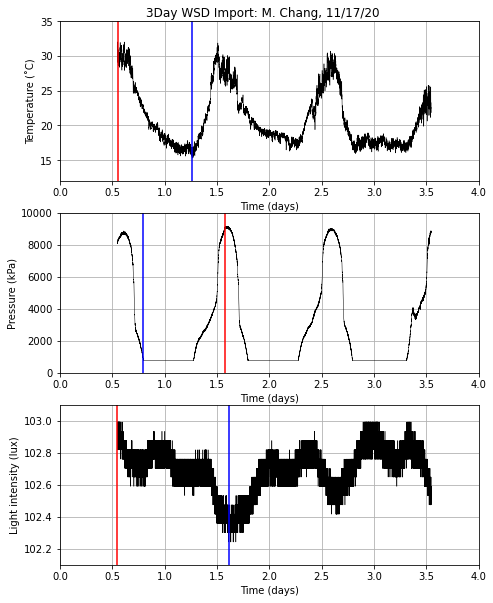

In [9]:
plt.figure(1, figsize = (7.5, 10)) #figure size
y_axis = np.array([[12, 35], [0, 10000], [102.1, 103.1]]) #y-limits for y-axis for each subplot
labels = ["Temperature (˚C)", "Pressure (kPa)", "Light intensity (lux)"] #labels for each subplot
data = [temp, inten, atm] #data for each subplot

for x in [0, 1, 2]:
    plt.subplot(3, 1, x+1)
    plt.xlim(0,4)
    plt.ylim(y_axis[x][0], y_axis[x][1])
    plt.plot(time, data[x], linewidth = 0.5, color="black")
    
    min_BA = (data[x] == np.min(data[x])) #boolean conditions for max and min times
    day_min = time[min_BA]
    
    max_BA = (data[x] == np.max(data[x]))
    day_max = time[max_BA]
    
    plt.axvline(color = "blue", x = day_min[0], label = "Minimum") #day of min value
    plt.axvline(color = "red", x = day_max[0], label = "Maximum") #day of max value
    
    plt.xlabel("Time (days)")
    plt.ylabel(labels[x])
    plt.grid()

plt.suptitle("3Day WSD Import: M. Chang, 11/17/20", y = 0.9)
plt.savefig("Chang_3DayWSD.png", dpi = 200)